In [16]:
"""
@Author: blankxiao
@file: A_4.py
@Created: 2024-09-07 22:50
@Desc: A_4 圆内变向
"""
import sympy as sp
import numpy as np
import pandas as pd

PI = np.pi




class Loong_head_pos():
    def __init__(self, spiral_d=1.7, R_0=4.5):
        """
        初始化类，保存计算所需的参数
        :param R_0: 半径
        :param spiral_d: 螺距
        """
        temp_ = (2 * PI * R_0) / spiral_d
        X = - (sp.cos(temp_) - temp_ * sp.sin(temp_))
        Y = - (sp.sin(temp_) + temp_ * sp.cos(temp_))
        x_0, y_0 = (R_0 * sp.cos(temp_), R_0 * sp.sin(temp_))

        self.cos_entrance_angle = - ((X * x_0) + (Y * y_0)) / (sp.sqrt(X ** 2 + Y ** 2) * sp.sqrt(x_0 ** 2 + y_0 ** 2))
        self.R_0 = R_0
        self.spiral_d = spiral_d
        self.cos_theta_pre = sp.sqrt(1 - self.cos_entrance_angle ** 2)
        self.theta_pre = sp.asin(self.cos_entrance_angle)

        # 圆的半径
        self.R_1 = R_0 * 2 / self.cos_theta_pre / 3
        self.R_2 = R_0 / self.cos_theta_pre / 3
        
        # 圆心极径
        self.r_O_1 = sp.sqrt(self.R_1 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_1 * self.cos_theta_pre)
        self.r_O_2 = sp.sqrt(self.R_2 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_2 * self.cos_theta_pre)
        
        # 圆心极角
        self.theta_O_1 = PI / 2 + sp.asin(self.R_1 / self.r_O_1 * self.cos_entrance_angle)
        self.theta_O_2 = - PI / 2 + sp.asin(self.R_2 / self.r_O_2 * self.cos_entrance_angle)


    def get_pos(self, t: int):
        """
        获取坐标
        四个区间
        alpha beta theta 
        分别代表入、内、外，
        """
        alpha = 0
        beta = 0
        theta = 0

        outer_threshold = (self.R_1 + self.R_2) * (PI - 2 * self.theta_pre)


        if t < 0:
            # 入 alpha有效 beta theta无效
            r_0 = sp.sqrt(self.R_0 ** 2 - self.spiral_d * t / PI)
            alpha = 2 * PI / self.spiral_d * (r_0 - self.R_0 + self.spiral_d / 4)
        elif t > outer_threshold:
            # 外 beta有效 alpha theta无效
            r_0 = sp.sqrt(self.R_0 ** 2 + self.spiral_d / PI * (t - (self.R_1 - self.R_2) * (PI - 2 * self.theta_pre)))
            beta = 2 * PI / self.spiral_d * (r_0 - self.R_0 + self.spiral_d / 4)
        else:
            # 内 theta有效 beta alpha无效
            big_threshold = self.R_1 * (PI - 2 * self.theta_pre)
            if t < big_threshold:
                
                D1_O1_A0 = t / self.R_1
                D1_O1_O = sp.acos((self.r_O_1 ** 2 + self.R_1 ** 2 - self.R_0 ** 2) / (2 * self.r_O_1 * self.R_1))
                O_O1_A0 = sp.Abs(D1_O1_A0 - D1_O1_O)
                r_0 = sp.sqrt(self.r_O_1 ** 2 + self.R_1 ** 2 - 2 * self.r_O_1 * self.R_1 * sp.cos(O_O1_A0))
                theta_threshold = self.R_1 * D1_O1_O
                O1_O_A0 = sp.acos((r_0 ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_0 * self.r_O_1))
                if t < theta_threshold:
                    theta = self.theta_O_1 - O1_O_A0
                else:
                    theta = self.theta_O_1 + O1_O_A0 - 2 * PI
            else:
                O_O2_A0 = sp.acos((self.r_O_2 ** 2 + self.R_2 ** 2 - self.R_0 ** 2) / (2 * self.r_O_2 * self.R_2)) + t / self.R_2 - (1 + self.R_1 / self.R_2) * (PI - 2 * self.theta_pre)
                r_0 = sp.sqrt(self.r_O_2 ** 2 + self.R_2 ** 2 - 2 * self.r_O_2 * self.R_2 * sp.cos(O_O2_A0))
                theta = self.theta_O_2 - O_O2_A0
        return r_0, alpha, beta, theta


class Loong_body_pos():
    def __init__(self, spiral_d=1.7, R_0=4.5):
        """
        初始化类，保存计算所需的参数
        :param R_0: 半径
        :param spiral_d: 螺距
        """
        self.R_0 = R_0
        
        # 把手到边缘的距离
        AD_d = 0.275

        # 龙头两个把手的间距
        self.L_loong_head = 3.41 - 2 * AD_d
        # 龙身两个把手的间距
        self.L_loong_body = 2.20 - 2 * AD_d
        

        temp_ = (2 * PI * R_0) / spiral_d
        X = - (sp.cos(temp_) - temp_ * sp.sin(temp_))
        Y = - (sp.sin(temp_) + temp_ * sp.cos(temp_))
        x_0, y_0 = (R_0 * sp.cos(temp_), R_0 * sp.sin(temp_))

        self.cos_entrance_angle = - ((X * x_0) + (Y * y_0)) / (sp.sqrt(X ** 2 + Y ** 2) * sp.sqrt(x_0 ** 2 + y_0 ** 2))
        self.R_0 = R_0
        self.spiral_d = spiral_d
        self.cos_theta_pre = sp.sqrt(1 - self.cos_entrance_angle ** 2)
        self.theta_pre = sp.asin(self.cos_entrance_angle)

        # 圆的半径
        self.R_1 = R_0 * 2 / self.cos_theta_pre / 3
        self.R_2 = R_0 / self.cos_theta_pre / 3
        
        # 圆心极径
        self.r_O_1 = sp.sqrt(self.R_1 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_1 * self.cos_theta_pre)
        self.r_O_2 = sp.sqrt(self.R_2 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_2 * self.cos_theta_pre)
        
        # 圆心极角
        self.theta_O_1 = PI / 2 + sp.asin(self.R_1 / self.r_O_1 * self.cos_entrance_angle)
        self.theta_O_2 = - PI / 2 + sp.asin(self.R_2 / self.r_O_2 * self.cos_entrance_angle)


        self.const_dict = {}
        func_list = [self.get_t1_r_1, self.get_t2_r_2, self.get_t3_r_3, self.get_t4_r_4]
        for i in range(len(func_list)):
            for pos in ["head", "body"]:
                L_len = self.L_loong_head if pos == "head" else self.L_loong_body
                self.const_dict[f"{i + 1}_{pos}"] = func_list[i](L_len)
                print(self.const_dict[f"{i + 1}_{pos}"])
        print()
        print(self.const_dict)
    
    def process_1(self, r_i):
        """
        通过r_i 获取 入螺线的alpha_i
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return 2 * PI / self.spiral_d * (r_i - self.R_0 + self.spiral_d / 4)


    def process_2(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_1 - sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_i * self.r_O_1))

    def process_3(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_1 + sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_i * self.r_O_1)) - 2 * PI

    def process_4(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_2 + sp.acos((r_i ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_i * self.r_O_2))

    def process_5(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return 2 * PI / self.spiral_d * (r_i - self.R_0 - self.spiral_d / 4)


    def get_t1_r_1(self, L_len: int):
        r_1_pre = sp.symbols('r_1_pre')
        theta_1_pre = self.theta_O_1 - sp.acos((r_1_pre ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_1_pre * self.r_O_1))
        ep = self.R_0 ** 2 + r_1_pre ** 2 - 2 * self.R_0 * r_1_pre * sp.cos(theta_1_pre - PI / 2) - L_len ** 2

        r_1_value = sp.re(sp.nsolve(ep, r_1_pre, self.R_0))
        theta_1_pre_value = theta_1_pre.subs({r_1_pre: r_1_value})
        return (r_1_value, theta_1_pre_value)

    def get_t2_r_2(self, L_len: int):
        r_2_pre = sp.symbols('r_2_pre')
        theta_2_pre = self.theta_O_2 - sp.acos((r_2_pre ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_2_pre * self.r_O_2))
        ep = self.r_O_1 ** 2 + r_2_pre ** 2 - 2 * self.r_O_1 * r_2_pre * sp.cos(theta_2_pre - self.theta_O_1 + PI) - L_len ** 2

        r_2_value = sp.re(sp.nsolve(ep, r_2_pre, self.R_0 / 2))
        theta_2_pre_value = theta_2_pre.subs({r_2_pre: r_2_value})
        return (r_2_value, theta_2_pre_value)


    def get_t3_r_3(self, L_len: int):
        r_3_pre = sp.symbols('r_3_pre')
        theta_3_pre = self.theta_O_2 - sp.acos((r_3_pre ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_3_pre * self.r_O_2))
        ep = (self.R_0 / 3) ** 2 + r_3_pre ** 2 - 2 * (self.R_0 / 3) * r_3_pre * sp.cos(theta_3_pre + PI / 2) - L_len ** 2

        r_3_value = sp.re(sp.nsolve(ep, r_3_pre, self.R_0 / 2))
        theta_3_pre_value = theta_3_pre.subs({r_3_pre: r_3_value})
        return r_3_value, theta_3_pre_value

    def get_t4_r_4(self, L_len: int):
        r_4_pre = sp.symbols('r_4_pre')
        beta_4_pre = 2 * PI / self.spiral_d * (r_4_pre - self.R_0 - self.spiral_d / 4)
        ep = self.R_0 ** 2 + r_4_pre ** 2 - 2 * self.R_0 * r_4_pre * sp.cos(beta_4_pre + PI / 2) - L_len ** 2

        r_4_value = sp.nsolve(ep, r_4_pre, self.R_0)
        theta_4_pre_value = beta_4_pre.subs({r_4_pre: r_4_value})
        return r_4_value, theta_4_pre_value


    def get_body_pos(self, r_i_pre, alpha_i_pre, beta_i_pre, theta_i_pre, point_index):
        """
        @param r_i_pre: 上一个点的半径
        @param alpha_i_pre: 上一个点的alpha
        @param beta_i_pre: 上一个点的beta
        @param theta_i_pre: 上一个点的theta
        @param point_index: 当前点的索引，从0开始
        """
        L_len = self.L_loong_head if point_index == 1 else self.L_loong_body
        L_label = 'body' if point_index == 1 else 'head'
        theta = 0

        
        threshold_1 = self.const_dict[f'1_{L_label}']
        threshold_2 = self.const_dict[f'2_{L_label}']
        threshold_3 = self.const_dict[f'3_{L_label}']
        threshold_4 = self.const_dict[f'4_{L_label}']

        if r_i_pre > self.R_0:
            # 调头前或调头后
            if alpha_i_pre != 0:
                # 掉头后
                theta = alpha_i_pre - 2 * PI / self.spiral_d * (r_i_pre - self.R_0 + self.spiral_d / 4)
            else:
                # 调头前
                if beta_i_pre >= threshold_4:
                    theta = beta_i_pre - 2 * PI / self.spiral_d * (r_i_pre - self.R_0 - self.spiral_d / 4)
                else:
                    theta = beta_i_pre - self.theta_O_2 + np.acos((r_i_pre ** 2 + self.r_O_2 ** 2 - self.R_0 ** 2) / (2 * r_i_pre * self.r_O_2))
        else:
            # 调头中
            if r_i_pre < threshold_1:
                # 入螺线-大圆弧
                theta = beta_i_pre - 2 * PI / self.spiral_d * (r_i_pre - self.R_0 + self.spiral_d / 4)
            elif r_i_pre < threshold_2:
                # 大圆弧-小圆弧
                theta = beta_i_pre - self.theta_O_1 + sp.acos((r_i_pre ** 2 + self.r_O_2 ** 2 - self.R_0 ** 2) / (2 * r_i_pre * self.r_O_2))
            elif r_i_pre < threshold_3:
                # 小圆弧-出螺线
                theta = alpha_i_pre - 2 * PI / self.spiral_d * (r_i_pre - self.R_0 - self.spiral_d / 4)
            else:
                theta = alpha_i_pre - self.theta_O_2 + sp.acos((r_i_pre ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_i_pre * self.r_O_2))

        r_i = sp.symbols("r_i")
        eq = r_i_pre ** 2 + r_i ** 2 - 2 * r_i_pre * r_i * sp.cos(theta) - L_len ** 2
        r_i_value = sp.nsolve(eq, r_i)

        alpha = 0
        theta = 0
        beta = 0
        if r_i_pre > self.R_0:
            # 调头前或调头后
            if alpha_i_pre != 0:
                # 掉头后
                alpha = self.process_1(r_i_value)
            else:
                # 调头前
                if beta_i_pre >= threshold_4:
                    beta = self.process_5(r_i_value)
                else:
                    beta = self.process_4(r_i_value)
        else:
            # 调头中
            if r_i_pre < threshold_1:
                # 入螺线-大圆弧
                beta = self.process_1(r_i_value)
            elif r_i_pre < threshold_2:
                # 大圆弧-小圆弧
                beta = self.process_2(r_i_value)

            elif r_i_pre < threshold_3:
                # 小圆弧-出螺线
                beta = self.process_3(r_i_value)
            else:
                beta = self.process_4(r_i_value)
        return r_i_value, alpha, beta, theta







In [ ]:



if __name__ == '__main__':
    loong_head_pos = Loong_head_pos()
    loong_body_pos = Loong_body_pos()
    point_num = 224
    time_range = np.linspace(-100, 100, 201)
    df_rav = pd.DataFrame()
    df_xyv = pd.DataFrame()
    for t in time_range:
        for point_index in range(point_num):
            if point_index == 0:
                r_0, alpha, beta, theta = loong_head_pos.get_pos(t)
                new_row = pd.DataFrame({'t': [t], 'r_0': [r_0], 'alpha': [alpha], 'beta': [beta], 'theta': [theta]})
                df_rav = pd.concat([df_rav, new_row], ignore_index=True)
            else:
                r_0, alpha, beta, theta = loong_body_pos.get_pos()
                new_row = pd.DataFrame({'t': [t], 'r_0': [r_0], 'alpha': [alpha], 'beta': [beta], 'theta': [theta]})
                df_rav = pd.concat([df_rav, new_row], ignore_index=True)


            angle = alpha
            if beta > 0:
                angle = beta
            elif theta > 0:
                angle = theta
            new_row = pd.DataFrame({'color': [True if alpha or beta else False], 'x': [sp.cos(angle) * r_0], 'y': [sp.sin(angle) * r_0]})
            df_xyv = pd.concat([df_xyv, new_row], ignore_index=True)






In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from matplotlib.collections import LineCollection


plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False    # 显示负号
def visualize_data(df):
    """
    可视化数据
    :param df: DataFrame，包含 r_0, alpha, beta, theta 列
    """
    # 创建图形
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 定义颜色映射
    color_map = {0: 'b', 1: 'green', 2: 'r'}
    
    # 绘制散点图
    for color in [0, 1, 2]:
        color_df = df[df["color"] == color]
        color_x = color_df['x']
        color_y = color_df['y']
        label = ["调头前", "调头时", "调头后"][color]
        ax.scatter(color_x, color_y, color=color_map[color], label=label)
    
    # 添加连线功能
    lines = []
    colors = []
    
    for i in range(len(df) - 1):
        x1, y1, color1 = df.iloc[i][['x', 'y', 'color']]
        x2, y2, color2 = df.iloc[i + 1][['x', 'y', 'color']]
        lines.append([(x1, y1), (x2, y2)])
        colors.append(color_map[color1])
    
    
    # 使用 LineCollection 绘制连线
    line_collection = LineCollection(lines, colors=colors, linewidths=1)
    ax.add_collection(line_collection)
    
    # 设置图形属性
    ax.set_title('问题4 龙头运动轨迹')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_aspect('equal')

    # 显示图形
    plt.show()


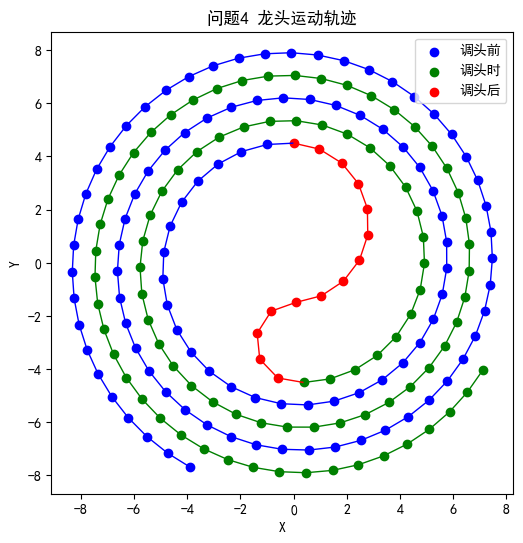

In [15]:

loong_head_pos = Loong_head_pos()

time_range = np.linspace(-100, 100, 201)
df_rav = pd.DataFrame()
df_xyv = pd.DataFrame()
for t in time_range:
    r_0, alpha, beta, theta = loong_head_pos.get_pos(t)
    new_row = pd.DataFrame({'t': [t], 'r_0': [r_0], 'alpha': [alpha], 'beta': [beta], 'theta': [theta]})
    df_rav = pd.concat([df_rav, new_row], ignore_index=True)
    angle = alpha
    color = 0
    if beta != 0:
        color = 1
        angle = beta
    elif theta != 0:
        color = 2
        angle = theta
    new_row = pd.DataFrame({'color': [color], 'x': [sp.cos(angle) * r_0], 'y': [sp.sin(angle) * r_0]})
    df_xyv = pd.concat([df_xyv, new_row], ignore_index=True)

df_xyv.to_csv("loong_head_pos_xy.csv")
df_rav.to_csv("loong_head_pos_ar.csv")
visualize_data(df_xyv)

In [28]:
"""
@Author: blankxiao
@file: A_4.py
@Created: 2024-09-07 22:50
@Desc: A_4 圆内变向
"""
import sympy as sp
import numpy as np
import pandas as pd

from A_1 import get_x_y

PI = np.pi




class Loong_head_pos():
    def __init__(self, spiral_d=1.7, R_0=4.5):
        """
        初始化类，保存计算所需的参数
        :param R_0: 半径
        :param spiral_d: 螺距
        """
        temp_ = (2 * PI * R_0) / spiral_d
        X = - (sp.cos(temp_) - temp_ * sp.sin(temp_))
        Y = - (sp.sin(temp_) + temp_ * sp.cos(temp_))
        x_0, y_0 = (R_0 * sp.cos(temp_), R_0 * sp.sin(temp_))

        self.cos_entrance_angle = - ((X * x_0) + (Y * y_0)) / (sp.sqrt(X ** 2 + Y ** 2) * sp.sqrt(x_0 ** 2 + y_0 ** 2))
        self.R_0 = R_0
        self.spiral_d = spiral_d
        self.cos_theta_pre = sp.sqrt(1 - self.cos_entrance_angle ** 2)
        self.theta_pre = sp.asin(self.cos_entrance_angle)

        # 圆的半径
        self.R_1 = R_0 * 2 / self.cos_theta_pre / 3
        self.R_2 = R_0 / self.cos_theta_pre / 3
        
        # 圆心极径
        self.r_O_1 = sp.sqrt(self.R_1 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_1 * self.cos_theta_pre)
        self.r_O_2 = sp.sqrt(self.R_2 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_2 * self.cos_theta_pre)
        
        # 圆心极角
        self.theta_O_1 = PI / 2 + sp.asin(self.R_1 / self.r_O_1 * self.cos_entrance_angle)
        self.theta_O_2 = - PI / 2 + sp.asin(self.R_2 / self.r_O_2 * self.cos_entrance_angle)


    def get_pos(self, t: int):
        """
        获取坐标
        四个区间
        alpha beta theta 
        分别代表入、内、外，
        """
        alpha = 0
        beta = 0
        theta = PI / 2

        outer_threshold = (self.R_1 + self.R_2) * (PI - 2 * self.theta_pre)


        if t < 0:
            # 入 alpha有效 beta theta无效
            r_0 = sp.sqrt(self.R_0 ** 2 - self.spiral_d * t / PI)
            alpha = 2 * PI / self.spiral_d * (r_0 - self.R_0 + self.spiral_d / 4)
        elif t > outer_threshold:
            # 外 beta有效 alpha theta无效
            r_0 = sp.sqrt(self.R_0 ** 2 + self.spiral_d / PI * (t - (self.R_1 - self.R_2) * (PI - 2 * self.theta_pre)))
            beta = 2 * PI / self.spiral_d * (r_0 - self.R_0 + self.spiral_d / 4)
        else:
            # 内 theta有效 beta alpha无效
            big_threshold = self.R_1 * (PI - 2 * self.theta_pre)
            if t < big_threshold:
                
                D1_O1_A0 = t / self.R_1
                D1_O1_O = sp.acos((self.r_O_1 ** 2 + self.R_1 ** 2 - self.R_0 ** 2) / (2 * self.r_O_1 * self.R_1))
                O_O1_A0 = sp.Abs(D1_O1_A0 - D1_O1_O)
                r_0 = sp.sqrt(self.r_O_1 ** 2 + self.R_1 ** 2 - 2 * self.r_O_1 * self.R_1 * sp.cos(O_O1_A0))
                theta_threshold = self.R_1 * D1_O1_O
                O1_O_A0 = sp.acos((r_0 ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_0 * self.r_O_1))
                if t < theta_threshold:
                    theta = self.theta_O_1 - O1_O_A0
                else:
                    theta = self.theta_O_1 + O1_O_A0 - 2 * PI
            else:
                O_O2_A0 = sp.acos((self.r_O_2 ** 2 + self.R_2 ** 2 - self.R_0 ** 2) / (2 * self.r_O_2 * self.R_2)) + t / self.R_2 - (1 + self.R_1 / self.R_2) * (PI - 2 * self.theta_pre)
                r_0 = sp.sqrt(self.r_O_2 ** 2 + self.R_2 ** 2 - 2 * self.r_O_2 * self.R_2 * sp.cos(O_O2_A0))
                theta = self.theta_O_2 - O_O2_A0
        return r_0, alpha, beta, theta


class Loong_body_pos():
    def __init__(self, spiral_d=1.7, R_0=4.5):
        """
        初始化类，保存计算所需的参数
        :param R_0: 半径
        :param spiral_d: 螺距
        """
        self.R_0 = R_0
        
        # 把手到边缘的距离
        AD_d = 0.275

        # 龙头两个把手的间距
        self.L_loong_head = 3.41 - 2 * AD_d
        # 龙身两个把手的间距
        self.L_loong_body = 2.20 - 2 * AD_d
        

        temp_ = (2 * PI * R_0) / spiral_d
        X = - (sp.cos(temp_) - temp_ * sp.sin(temp_))
        Y = - (sp.sin(temp_) + temp_ * sp.cos(temp_))
        x_0, y_0 = (R_0 * sp.cos(temp_), R_0 * sp.sin(temp_))

        self.cos_entrance_angle = - ((X * x_0) + (Y * y_0)) / (sp.sqrt(X ** 2 + Y ** 2) * sp.sqrt(x_0 ** 2 + y_0 ** 2))
        self.R_0 = R_0
        self.spiral_d = spiral_d
        self.cos_theta_pre = sp.sqrt(1 - self.cos_entrance_angle ** 2)
        self.theta_pre = sp.asin(self.cos_entrance_angle)

        # 圆的半径
        self.R_1 = R_0 * 2 / self.cos_theta_pre / 3
        self.R_2 = R_0 / self.cos_theta_pre / 3
        
        # 圆心极径
        self.r_O_1 = sp.sqrt(self.R_1 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_1 * self.cos_theta_pre)
        self.r_O_2 = sp.sqrt(self.R_2 ** 2 + R_0 ** 2 - 2 * R_0 * self.R_2 * self.cos_theta_pre)
        
        # 圆心极角
        self.theta_O_1 = PI / 2 + sp.asin(self.R_1 / self.r_O_1 * self.cos_entrance_angle)
        self.theta_O_2 = - PI / 2 + sp.asin(self.R_2 / self.r_O_2 * self.cos_entrance_angle)


        self.const_dict = {}
        func_list = [self.get_t1_r_1, self.get_t2_r_2, self.get_t3_r_3, self.get_t4_r_4]
        for i in range(len(func_list)):
            for pos in ["head", "body"]:
                L_len = self.L_loong_head if pos == "head" else self.L_loong_body
                self.const_dict[f"{i + 1}_{pos}"] = func_list[i](L_len)
                print(self.const_dict[f"{i + 1}_{pos}"])
        print()
        print(self.const_dict)
    
    def process_1(self, r_i):
        """
        通过r_i 获取 入螺线的alpha_i
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return 2 * PI / self.spiral_d * (r_i - self.R_0 + self.spiral_d / 4)


    def process_2(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_1 - sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_i * self.r_O_1))

    def process_3(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_1 + sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_i * self.r_O_1)) - 2 * PI

    def process_4(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return self.theta_O_2 + sp.acos((r_i ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_i * self.r_O_2))

    def process_5(self, r_i):
        """
        @param r_i: r_i 获取
        @return: alpha_i
        """
        return 2 * PI / self.spiral_d * (r_i - self.R_0 - self.spiral_d / 4)


    def get_t1_r_1(self, L_len: int):
        r_1_pre = sp.symbols('r_1_pre')
        theta_1_pre = self.theta_O_1 - sp.acos((r_1_pre ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_1_pre * self.r_O_1))
        ep = self.R_0 ** 2 + r_1_pre ** 2 - 2 * self.R_0 * r_1_pre * sp.cos(theta_1_pre - PI / 2) - L_len ** 2

        r_1_value = sp.re(sp.nsolve(ep, r_1_pre, self.R_0))
        theta_1_pre_value = theta_1_pre.subs({r_1_pre: r_1_value})
        return (r_1_value, theta_1_pre_value)

    def get_t2_r_2(self, L_len: int):
        r_2_pre = sp.symbols('r_2_pre')
        theta_2_pre = self.theta_O_2 - sp.acos((r_2_pre ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_2_pre * self.r_O_2))
        ep = self.r_O_1 ** 2 + r_2_pre ** 2 - 2 * self.r_O_1 * r_2_pre * sp.cos(theta_2_pre - self.theta_O_1 + PI) - L_len ** 2

        r_2_value = sp.re(sp.nsolve(ep, r_2_pre, self.R_0 / 2))
        theta_2_pre_value = theta_2_pre.subs({r_2_pre: r_2_value})
        return (r_2_value, theta_2_pre_value)


    def get_t3_r_3(self, L_len: int):
        r_3_pre = sp.symbols('r_3_pre')
        theta_3_pre = self.theta_O_2 - sp.acos((r_3_pre ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_3_pre * self.r_O_2))
        ep = (self.R_0 / 3) ** 2 + r_3_pre ** 2 - 2 * (self.R_0 / 3) * r_3_pre * sp.cos(theta_3_pre + PI / 2) - L_len ** 2

        r_3_value = sp.re(sp.nsolve(ep, r_3_pre, self.R_0 / 2))
        theta_3_pre_value = theta_3_pre.subs({r_3_pre: r_3_value})
        return (r_3_value, theta_3_pre_value)

    def get_t4_r_4(self, L_len: int):
        r_4_pre = sp.symbols('r_4_pre')
        beta_4_pre = 2 * PI / self.spiral_d * (r_4_pre - self.R_0 - self.spiral_d / 4)
        ep = self.R_0 ** 2 + r_4_pre ** 2 - 2 * self.R_0 * r_4_pre * sp.cos(beta_4_pre + PI / 2) - L_len ** 2

        r_4_value = sp.nsolve(ep, r_4_pre, self.R_0)
        theta_4_pre_value = beta_4_pre.subs({r_4_pre: r_4_value})
        return (r_4_value, theta_4_pre_value)


    def get_pos(self, r_i_pre, alpha_i_pre, beta_i_pre, theta_i_pre, point_index):
        """
        @param r_i_pre: 上一个点的半径
        @param alpha_i_pre: 上一个点的alpha
        @param beta_i_pre: 上一个点的beta
        @param theta_i_pre: 上一个点的theta
        @param point_index: 当前点的索引，从0开始
        """
        L_len = self.L_loong_head if point_index == 1 else self.L_loong_body
        L_label = 'body' if point_index == 1 else 'head'
        theta = 0

        
        threshold_1 = self.const_dict[f'1_{L_label}']
        threshold_2 = self.const_dict[f'2_{L_label}']
        threshold_3 = self.const_dict[f'3_{L_label}']
        threshold_4 = self.const_dict[f'4_{L_label}']

        r_i = sp.symbols("r_i")
        guess_num = r_i_pre
        if r_i_pre > self.R_0:
            # 调头前或调头后
            if alpha_i_pre != 0:
                # 掉头前
                
                theta = alpha_i_pre - 2 * PI / self.spiral_d * (r_i - self.R_0 + self.spiral_d / 4)
            else:
                # 调头后
                if beta_i_pre >= threshold_4[1]:
                    theta = beta_i_pre - 2 * PI / self.spiral_d * (r_i - self.R_0 - self.spiral_d / 4)
                else:
                    theta = beta_i_pre - self.theta_O_2 + sp.acos((r_i ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_i * self.r_O_2))
        else:
            guess_num =self.R_0
            # 调头中
            if theta_i_pre > threshold_1[1]:
                theta = theta_i_pre - 2 * PI / self.spiral_d * (r_i - self.R_0 + self.spiral_d / 4)
            elif theta_i_pre > - PI / 2 or (theta_i_pre <= - PI / 2 and r_i_pre < threshold_2[0]):
                theta = theta_i_pre - self.theta_O_1 + sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_0 ** 2) / (2 * r_i * self.r_O_1))
            elif theta_i_pre < threshold_3[1]:
                theta = theta_i_pre - self.theta_O_1 - sp.acos((r_i ** 2 + self.r_O_1 ** 2 - self.R_1 ** 2) / (2 * r_i * self.r_O_1)) + 2 * PI
            else:
                theta = theta_i_pre - self.theta_O_2 + sp.acos((r_i ** 2 + self.r_O_2 ** 2 - self.R_2 ** 2) / (2 * r_i * self.r_O_2))

        eq = r_i_pre ** 2 + r_i ** 2 - 2 * r_i_pre * r_i * sp.cos(theta) - L_len ** 2
        # r_i_value = (sp.re(sp.nsolve(eq, r_i, guess_num)))
        try:
            r_i_value = abs(sp.re(sp.nsolve(eq, r_i, guess_num)))
        except Exception as e:
            try: 
                guess_num = r_i_pre if guess_num != r_i_pre else self.R_0
                r_i_value = abs(sp.re(sp.nsolve(eq, r_i, guess_num)))
            except:
                r_i_value = r_i_pre - np.random.randint(0, 1)

        # 初始化角度
        alpha = 0
        theta = PI / 2
        beta = 0
        if r_i_pre > self.R_0:
            # 调头前或调头后
            if alpha_i_pre != 0:
                # 掉头后
                alpha = self.process_1(r_i_value)
            else:
                # 调头前
                if beta_i_pre >= threshold_4[1]:
                    beta = self.process_5(r_i_value)
                else:
                    theta = self.process_4(r_i_value)
        else:
            # 调头中
            if theta_i_pre > threshold_1[1]:
                # 入螺线-大圆弧
                alpha = self.process_1(r_i_value)
            elif theta_i_pre > - PI / 2 or (theta_i_pre <= - PI / 2 and r_i_pre < threshold_2[0]):
                # 大圆弧-小圆弧
                theta = self.process_2(r_i_value)

            elif theta_i_pre < threshold_3[1]:
                # 小圆弧-出螺线
                theta = self.process_3(r_i_value)
            else:
                theta = self.process_4(r_i_value)
        return r_i_value, alpha, beta, theta








if __name__ == '__main__':
    loong_head_pos = Loong_head_pos()
    loong_body_pos = Loong_body_pos()
    point_num = 224
    # time_range = [int(i) for i in np.linspace(-100, 100, 201).tolist()]
    time_range = [i for i in range(-100, 101)]

    df_xyv = pd.DataFrame(index=pd.MultiIndex.from_product([range(point_num), ['x', 'y', "v"]]), columns=[f'{i} s' for i in time_range])

    df_rav = pd.DataFrame(index=pd.MultiIndex.from_product([range(point_num), ['r_0', 'alpha', "beta", "theta", "v"]]), columns=time_range)

    index_list = [f'龙头{s} (m)' for s in ["x", "y"]] + [f'第{i}节龙身{s} (m)' for i in range(1, point_num - 2) for s in ["x", 'y']] +[f'龙尾{s} (m)' for s in ["x", 'y']] + [f'龙尾（后）{s} (m)' for s in ["x", 'y']]
    df_position = pd.DataFrame(index=index_list,
    columns=[f'{t} s' for t in time_range])

    df_velocity = pd.DataFrame(index=[
        ['龙头 (m/s)'] + [f'第{i}节龙身  (m/s)' for i in range(1, point_num - 2)] +
        ['龙尾  (m/s)', '龙尾（后） (m/s)']
    ], columns=[f'{t} s' for t in time_range])

    for t in time_range:
        for point_index in range(point_num):
            if point_index == 0:
                r_0, alpha, beta, theta = loong_head_pos.get_pos(t)
                
            else:
                r_0_pre=df_rav[t][point_index - 1, 'r_0']
                alpha_pre=df_rav[t][point_index - 1, 'alpha']
                beta_pre=df_rav[t][point_index - 1, 'beta']
                theta_pre=df_rav[t][point_index - 1, 'theta']

                r_0, alpha, beta, theta = loong_body_pos.get_pos(r_i_pre=r_0, alpha_i_pre=alpha_pre, beta_i_pre=beta_pre, theta_i_pre=theta_pre, point_index=point_index)
            
            df_rav.at[(point_index, 'r_0'), t] = r_0
            df_rav.at[(point_index, 'alpha'), t] = alpha
            df_rav.at[(point_index, 'theta'), t] = theta
            df_rav.at[(point_index, 'beta'), t] = beta
            # df_rav.at[(point_index, 'v'), t] = cur_v


            angle = alpha
            if beta != 0:
                angle = beta
            elif theta != 0 and theta != PI / 2:
                angle = theta
            x, y = get_x_y(alpha=-angle, r=r_0)
            
            x_index = f"第{point_index}节龙身x (m)"
            y_index = f"第{point_index}节龙身y (m)"
            v_index = f"第{point_index}节龙身  (m/s)"
            if point_index == 0:
                x_index = f"龙头x (m)"
                y_index = f"龙头y (m)"
                v_index = f"龙头 (m/s)"
            elif point_index == point_num - 2:
                x_index = f"龙尾x (m)"
                y_index = f"龙尾y (m)"
                v_index = f"龙尾  (m/s)"
            elif point_index == point_num - 1:
                x_index = f"龙尾（后）x (m)"
                y_index = f"龙尾（后）y (m)"
                v_index = f"龙尾（后） (m/s)"

            df_position.at[x_index, f"{t} s"] = round(x, 6)
            df_position.at[y_index, f"{t} s"] = round(y, 6)
    with pd.ExcelWriter('rusult4.xlsx') as writer:
        df_position.to_excel(writer, sheet_name='位置')

    # df_rav.to_csv('rav_data.csv')






(3.85300371648102, 0.888603551750769)
(4.24811094311231, 1.19564283178805)
(4.25189713131112, -1.77452225132551)
(2.63689105461306, -2.06493303504020)
(4.32873837386745, -1.73648176183517)
(2.81664705839292, -2.05945185592554)
(4.67131999862687, -0.937599092560564)
(4.59850636532029, -1.20671765194541)

{'1_head': (3.85300371648102, 0.888603551750769), '1_body': (4.24811094311231, 1.19564283178805), '2_head': (4.25189713131112, -1.77452225132551), '2_body': (2.63689105461306, -2.06493303504020), '3_head': (4.32873837386745, -1.73648176183517), '3_body': (2.81664705839292, -2.05945185592554), '4_head': (4.67131999862687, -0.937599092560564), '4_body': (4.59850636532029, -1.20671765194541)}


RangeIndex(start=0, stop=0, step=1)